
# Assignment No 3a
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Decision Tree Classifier.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



### Decision Tree Classifier

Now in this assignment we will be implementing the Decision Classifier for both Continuous and Categorical attributes.

You will be testing your implementations with three different split criterias, namely:
 - Information Gain
 - Gini Index
 - CART 


In [2]:
%pylab inline
import scipy.stats
#from collections import defaultdict
import pandas as pd
import tools as t
from math import log
#from sklearn.cross_validation import train_test_split
from collections import defaultdict, Counter
import time

Populating the interactive namespace from numpy and matplotlib


In [81]:
class Node:
    def __init__(self,purity,klasslabel='',score=0,split=[],fidx=-1):
        self.lchild=None
        self.rchild=None
        self.klasslabel=klasslabel        
        self.split=split
        self.score=score
        self.fidx=fidx
        self.purity=purity
        self.ftype= 'categorical' if type(self.split) in [tuple, str, numpy.string_] else 'continuous'
        
    def set_childs(self,lchild,rchild):
        self.lchild=lchild
        self.rchild=rchild
    def isleaf(self):
        if (self.lchild is None)&(self.rchild is None):
            return True
        return False
    def isless_than_eq(self, X):
        if self.ftype=='categorical':
            if X[self.fidx] in self.s
            plit:
                return True
            return False
        else:
            if X[self.fidx] <= self.split:
                return True
            return False
    def get_str(self):        
        if self.isleaf():
            return 'C(class={},Purity={})'.format(self.klasslabel,self.purity)
        else:
            return 'I(Fidx={},Score={},Split={})'.format(self.fidx,self.score,self.split)

In [90]:
class DecisionTree:
    def __init__(self, purityp, exthreshold, maxdepth=10):        
        self.purity = purityp
        self.exthreshold = exthreshold
        self.maxdepth = maxdepth
        pass
    def train(self, X, Y):
        nexamples, nfeatures = X.shape
        self.tree=self.build_tree(X,Y,0)
    def build_tree(self, X, Y,depth):
        nexamples, nfeatures = X.shape
        klasses,klasses_counts=np.unique(Y,return_counts=True);
        nexamples=nexamples*1.0
        leafLabel = ""
        purityd=0
        for k in klasses:
            temp = np.count_nonzero(Y[Y == k]) / nexamples
            if(temp > purityd):
                purityd = temp
                leafLabel = k
        if depth >= self.maxdepth or purityd >= self.purity or nexamples <= self.exthreshold:
            node=Node(purityd,klasslabel=leafLabel)
        else:
            splitS=+np.inf
            splitP=0
            onfe=0
            SDY=[]
            SDN=[]
            for fe in xrange(nfeatures):
                self.classes=np.unique(Y)
                self.nclasses=len(np.unique(Y))
                if type(X[0,fe]) is int  or float:
                    val,sco,dn,dy=self.evaluate_numerical_attribute(X[:,fe],Y)
                if splitS > sco:
                    splitS=sco
                    splitP=val
                    SDN=dn
                    SDY=dy
                    onfe=fe
            if splitP==0:
                for k in klasses:
                                temp = np.count_nonzero(Y[Y == k]) / nexamples
                                if(temp > purityd):
                                    purityd = temp
                                    leafLabel = k
                node=Node(purityd,klasslabel=leafLabel)
            else:
                node=Node(purityd,score=splitS,split=splitP,fidx=onfe)
                node.lchild=self.build_tree(X[SDN,:],Y[SDN],depth+1)
                node.rchild=self.build_tree(X[SDY,:],Y[SDY],depth+1)
        return node
    def test(self, X):
        nexamples, nfeatures = X.shape
        pclasses = self.predict(X)
        return np.array(pclasses)
    def evaluate_numerical_attribute(self, feat, Y):
        classes = np.unique(Y)
        nclasses = len(classes)
        sidx=np.argsort(feat)
        f=feat[sidx]
        sY=Y[sidx]
        Midpoints=set()
        nt=defaultdict(int)
        N={}
        for i in xrange(nclasses):
            nt[classes[i]]=0
        for i in xrange(len(f)-1):
            nt[sY[i]]+=1
            if f[i]!=f[i+1]:
                v=(f[i]+f[i+1])/2
                Midpoints.add(v)
                N[v]=nt.values()
        nt[sY[len(f)-1]]+=1
        n={}
        for i,tmp in enumerate(nt.keys()):
            n[i]=nt[tmp]*1.0
        split=0
        mingain=+np.inf
        for v in Midpoints:
            en_dy=0.0
            en_dn=0.0
            for i in xrange(nclasses):
                tmp=N[v][i]*1.0
                if tmp > 0.0:
                    en_dy+=(tmp/sum(N[v]))*np.log2(tmp/sum(N[v]))
                tmp1=(n[i]-tmp)*1.0
                if tmp1 > 0.0:
                    en_dn+=(tmp1/sum(n.values()-np.array(N[v])))*np.log2(tmp1/sum(n.values()-np.array(N[v])))
            tmp=((sum(N[v])*1.0)/sum(n.values()))
            gain=(-1)*((en_dy*tmp)+(en_dn*(1.0-tmp)))
            if (gain < mingain):
                split=v
                mingain=gain
        temp=np.array((feat))
        Xlidx=temp<split
        Xridx=temp>split
        return split,mingain,Xlidx,Xridx
    def predict(self, X):
        z = []
        for idx in range(X.shape[0]):
            z.append(self._predict(self.tree, X[idx, :]))
        return z 
    def _predict(self, node, X):
        if node.isleaf():
            return node.klasslabel
        if node.isless_than_eq(X):
            return self._predict(node.lchild,X)
        return self._predict(node.rchild,X)
    def __str__(self):
        str = '---------------------------------------------------'
        str += '\n A Decision Tree With Depth={}'.format(self.find_depth())
        str += self.__print(self.tree)
        str += '\n---------------------------------------------------'
        return str
    def find_depth(self):
        return self._find_depth(self.tree)
    def _find_depth(self, node):
        if not node:
            return
        if node.isleaf():
            return 1
        else:
            return max(self._find_depth(node.lchild), self._find_depth(node.rchild)) + 1
    def __print(self, node, depth=0):
        ret = ""
        if node.rchild:
            ret += self.__print(node.rchild, depth + 1)
        ret += "\n" + ("    "*depth) + node.get_str()
        if node.lchild:
            ret += self.__print(node.lchild, depth + 1)
        return ret

In [83]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [84]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [85]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

### Debugging Tip
You can import pdb and call its function set_trace (i.e pdb.set_trace()) any where in your code to stop the execution of your code and inspect it line by line by using pdf. Otherwise, you can use Pycharm GUI debugger.

In [10]:
# import pdb 
# pdb.set_trace()

In [11]:
np.sum((X[:,0]<=5.45) & (Y=='Iris-versicolor'))

7

In [12]:
print ['{:0.5}'.format(p) for p in X[:,0]]

['4.9', '4.7', '4.6', '5.0', '5.4', '4.6', '5.0', '4.4', '4.9', '5.4', '4.8', '4.8', '4.3', '5.8', '5.7', '5.4', '5.1', '5.7', '5.1', '5.4', '5.1', '4.6', '5.1', '4.8', '5.0', '5.0', '5.2', '5.2', '4.7', '4.8', '5.4', '5.2', '5.5', '4.9', '5.0', '5.5', '4.9', '4.4', '5.1', '5.0', '4.5', '4.4', '5.0', '5.1', '4.8', '5.1', '4.6', '5.3', '5.0', '7.0', '6.4', '6.9', '5.5', '6.5', '5.7', '6.3', '4.9', '6.6', '5.2', '5.0', '5.9', '6.0', '6.1', '5.6', '6.7', '5.6', '5.8', '6.2', '5.6', '5.9', '6.1', '6.3', '6.1', '6.4', '6.6', '6.8', '6.7', '6.0', '5.7', '5.5', '5.5', '5.8', '6.0', '5.4', '6.0', '6.7', '6.3', '5.6', '5.5', '5.5', '6.1', '5.8', '5.0', '5.6', '5.7', '5.7', '6.2', '5.1', '5.7', '6.3', '5.8', '7.1', '6.3', '6.5', '7.6', '4.9', '7.3', '6.7', '7.2', '6.5', '6.4', '6.8', '5.7', '5.8', '6.4', '6.5', '7.7', '7.7', '6.0', '6.9', '5.6', '7.7', '6.3', '6.7', '7.2', '6.2', '6.1', '6.4', '7.2', '7.4', '7.9', '6.4', '6.3', '6.1', '7.7', '6.3', '6.4', '6.0', '6.9', '6.7', '6.9', '5.8', '6.8'

In [91]:
print len(Y)
feat=[0,1]
dt=DecisionTree(0.95,5,2)
feat=[0,1]
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)

# You should get following result:, see the example on book page 490-491, Data Mining and Analysis...
# Split=5.45, H(DY)=0.577004250316,P(DY)=0.342281879195,H(DN)=0.290715865467,P(DN)=0.657718120805,gain=0.388707191825

149


In [92]:
dt.classes=np.unique(Y)
dt.nclasses=len(np.unique(Y))
split,mingain,Xlidx,Xridx=dt.evaluate_numerical_attribute(X[:,0],Y)

In [93]:
from nose.tools import assert_almost_equal, assert_equal

assert_equal(split, 5.45)
assert_almost_equal(mingain, 0.38, places=1)

In [94]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print len(Y)
feat=[2,3]
dt=DecisionTree(0.95,5)
dt.train(X[:,feat],Y)
# g,s,xl,xr=dt.evaluate_numerical_attribute(X[:,2],Y)
#print g, s, xl, xr

149


In [95]:
print dt

---------------------------------------------------
 A Decision Tree With Depth=2
    C(class=Iris-versicolor,Purity=1.0)
I(Fidx=0,Score=-0.0,Split=2.45)
    C(class=Iris-setosa,Purity=1.0)
---------------------------------------------------


In [96]:
print dt.find_depth()

2


 Plotting the Decision Surface of Training Set... 


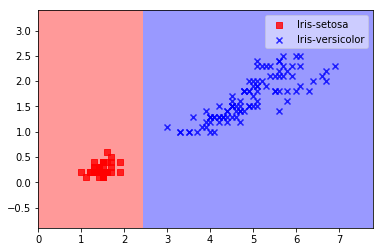

In [97]:
# %pdb
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(X[:,feat],Y,clf=dt, res=0.1, cycle_marker=True, legend=1)

In [98]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [99]:
# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)

In [100]:
#Lets test it on the set of unseen examples...
pclasses=dt.predict(Xtest[:,feat])

In [101]:
print pclasses

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor']


Lets see how good we are doing...
==================

In [102]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

44
Accuracy =  0.977777777778


 Plotting the Decision Surface of Training Set... 


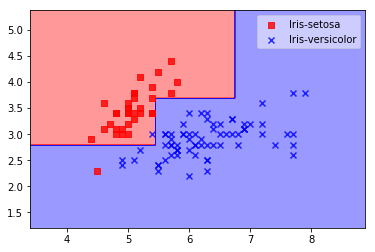

In [103]:
#Lets plot the decision surface
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,feat],Ytrain,clf=dt, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Test Set... 


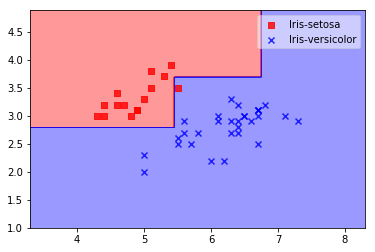

In [104]:
print " Plotting the Decision Surface of Test Set... "
t.plot_decision_regions(Xtest[:,feat],Ytest,clf=dt, res=0.02, cycle_marker=True, legend=1)

In [105]:
from nose.tools import assert_greater_equal
feat=[0,1]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.90)

# Lets Train on all four features....

In [106]:
#Lets Train on all four features....

# Lets train a Decision Tree Classifier on Petal Length and Width
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

45
Accuracy =  1.0


# Lets Train on all four features and for all three classes....

In [107]:
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


In [108]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


In [109]:
feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

43
Accuracy =  0.955555555556


In [110]:
from nose.tools import assert_greater_equal

feat=[0, 1, 2, 3]
dt=DecisionTree(0.95,5)
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.90)

What can you conclude ?
====================
Please write your observation....



# Cross-Validation

Until now we have been splitting the dataset into a training and test set rather randomly and were reporting a rather artifical performance. Now we are going to test our system exhaustively by making use of k-fold [cross validation](http://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Now go and tune your hyper-parameters (purity, exthreshold) to opitmize the performance.

In [114]:
# Now lets cross validate for best paramters, and test the result...
# We will be training four different models on four different partitions of data set and 
# then will be reporting the mean accuracy of the four classifiers.

nfolds=4 # lets use four folds..
folds=t.generate_folds(X,Y,nfolds)
features=[0,1, 2, 3] # features to use for our system
#now lets train and test on these folds...

#Lets perform the grid search...
purity=np.linspace(0.85,0.97,13) # You can also search over depth as well....
nexamp=np.linspace(5,25,21)  

params=np.zeros((len(purity),len(nexamp)))
foldacc=[]          
dict_k = {}
# YOUR CODE HERE
start = time.time()
for purity_idx,ks_ in enumerate(purity):
    for nexampl_idx,ks1_ in enumerate(nexamp):
        total_acc = 0.0
        mean_acc = 0.0
        for nfolds_ in range(nfolds):
            X_train, Y_train, X_test, Y_test = folds[nfolds_]
            feat=[0, 1, 2, 3]
            dt=DecisionTree(ks_,ks1_)
            dt.train(Xtrain[:,feat],Ytrain)
            pclasses=dt.predict(Xtest[:,feat])
            acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
            total_acc+=acc
            print "[Fold ",nfolds_,"] Accuracy = ",acc
            params[purity_idx,nexampl_idx] = acc
        mean_acc = total_acc/float(nfolds)
        print "For Purity= ",ks_," Nexample-threshold= ",ks1_,", Mean Accuracy, ",mean_acc
        foldacc.append(mean_acc)
        dict_k[ks_]=mean_acc
end = time.time()
print "Total time taken =",(end-start)

Generating CV data for 3 classes
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.85  Nexample-threshold=  5.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.85  Nexample-threshold=  6.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.85  Nexample-threshold=  7.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.85  Nexample-threshold=  8.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Ac

[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.86  Nexample-threshold=  21.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.86  Nexample-threshold=  22.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.86  Nexample-threshold=  23.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.86  Nexample-threshold=  24.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For 

[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.88  Nexample-threshold=  17.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.88  Nexample-threshold=  18.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.88  Nexample-threshold=  19.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.88  Nexample-threshold=  20.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For 

[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.9  Nexample-threshold=  12.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.9  Nexample-threshold=  13.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.9  Nexample-threshold=  14.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.9  Nexample-threshold=  15.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.9  Nexample-threshold=  16.0 , 

[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.92  Nexample-threshold=  7.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.92  Nexample-threshold=  8.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.92  Nexample-threshold=  9.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.92  Nexample-threshold=  10.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Pur

[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.93  Nexample-threshold=  23.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.93  Nexample-threshold=  24.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.93  Nexample-threshold=  25.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.94  Nexample-threshold=  5.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.94  Nexample-threshold=  6.0

[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.95  Nexample-threshold=  19.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.95  Nexample-threshold=  20.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.95  Nexample-threshold=  21.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.95  Nexample-threshold=  22.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fol

[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.97  Nexample-threshold=  13.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.97  Nexample-threshold=  14.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.97  Nexample-threshold=  15.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.97  Nexample-threshold=  16.0 , Mean Accuracy,  0.955555555556
[Fold  0 ] Accuracy =  0.955555555556
[Fold  1 ] Accuracy =  0.955555555556
[Fold  2 ] Accuracy =  0.955555555556
[Fold  3 ] Accuracy =  0.955555555556
For Purity=  0.97  Nexample-threshold=  17

In [115]:
np.save('dt-cv',params)

In [116]:
print params

[[ 0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556]
 [ 0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556]
 [ 0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556]
 [ 0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.95555556
   0.95555556  0.95555556  0.95555556  0.95555556  0.95555556  0.9555

In [117]:
print params.shape

(13, 21)


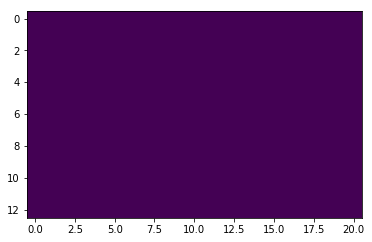

In [118]:
plt.imshow(params) # displayc the accuracy as 2D image...

Text(0.5,0,u'Mean Accuracy across 4-Folds')

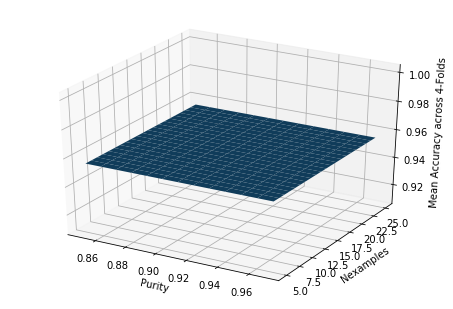

In [119]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
tX, tY = np.meshgrid(purity, nexamp)
ax.plot_surface(tX,tY,params.T)
ax.set_xlabel('Purity')
ax.set_ylabel('Nexamples')
ax.set_zlabel('Mean Accuracy across {}-Folds'.format(nfolds))
# ax.scatter3D(data['SepalLength'],data['PetalLength'],data['PetalWidth'])
#(params,ax,'Purity','Example-Threshold','Mean-Accuracy')

In [120]:
print params.shape, tX.shape, tY.shape

(13, 21) (21, 13) (21, 13)


In [121]:
#print the row and column  index of m
#single line code
ridx,cidx= np.unravel_index(np.argmax(params), params.shape)

# simple step-wise code

cidx=np.argmax(params.max(axis=0))
ridx=np.argmax(params[:,cidx])
print ridx, cidx

0 0


In [122]:
print 'CV Best Parameters are, purity={}, nexamp={}, mean accuracy={}'.format(purity[ridx],nexamp[cidx],params[ridx,cidx])

CV Best Parameters are, purity=0.85, nexamp=5.0, mean accuracy=0.955555555556


In [123]:
print purity[ridx],nexamp[cidx]
dt=DecisionTree(purity[ridx],nexamp[cidx])
dt.train(Xtrain[:,feat],Ytrain)
pclasses=dt.predict(Xtest[:,feat])
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

0.85 5.0
43
Accuracy =  0.955555555556


In [79]:
print dt.find_depth()

3


In [80]:
print dt

---------------------------------------------------
 A Decision Tree With Depth=3
        C(class=Iris-virginica,Purity=1.0)
    I(Fidx=3,Score=0.21630646308,Split=1.75)
        C(class=Iris-versicolor,Purity=0.921052631579)
I(Fidx=2,Score=0.673076923077,Split=2.45)
    C(class=Iris-setosa,Purity=1.0)
---------------------------------------------------
